# **Values of $A_{lin}$ that break the neural networks performance:**
## Classification task: Primordial feature template vs ΛCDM at the CMB angular power spectra level

In [12]:
#Import packages
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt

In [13]:
#Read the data
def read_component_data(file_path, start_line):
    Ax0, Corr_pred, Wrong_pred = [], [], []
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for line in lines[start_line:]:
            #Stop reading if there's a new header
            if line.startswith("#"):
                break
            #Split the data and convert to floats
            data = line.strip().split(',')
            if len(data) == 3:
                Ax0.append(float(data[0]))
                Corr_pred.append(float(data[1]))
                Wrong_pred.append(float(data[2]))
    return np.array(Ax0), np.array(Corr_pred), np.array(Wrong_pred)

file_path = './A_lin_size.txt'

#Read data for each component
Ax0, Corr_CEE, Wrong_CEE = read_component_data(file_path, 2)  #CEE data starts in line 2
Ax0_CTE, Corr_CTE, Wrong_CTE = read_component_data(file_path, 9)  #CTE data starts in line 9
Ax0_CTT, Corr_CTT, Wrong_CTT = read_component_data(file_path, 16) #CTT data starts in line 16
Ax0_Joint, Corr_Joint, Wrong_Joint = read_component_data(file_path, 23)  # Joint analysis starts in line 23

print("CEE component:", Ax0, Corr_CEE, Wrong_CEE)
print("CTE component:", Ax0, Corr_CTE, Wrong_CTE)
print("CTT component:", Ax0, Corr_CTT, Wrong_CTT)
print("Joint analysis:", Ax0, Corr_Joint, Wrong_Joint)

CEE component: [1.e-02 1.e-03 1.e-04 1.e-05 1.e-06] [1.   1.   0.66 0.4  0.39] [0.   0.   0.34 0.6  0.61]
CTE component: [1.e-02 1.e-03 1.e-04 1.e-05 1.e-06] [1.    0.953 0.407 0.403 0.4  ] [0.    0.047 0.593 0.597 0.6  ]
CTT component: [1.e-02 1.e-03 1.e-04 1.e-05 1.e-06] [1.    0.836 0.4   0.4   0.393] [0.    0.163 0.6   0.6   0.607]
Joint analysis: [1.e-02 1.e-03 1.e-04 1.e-05 1.e-06] [1.    0.99  0.563 0.403 0.41 ] [0.    0.01  0.436 0.596 0.59 ]


## $A_{lin}$ size effect on the NN, trained with $C^{EE}_{\ell}$ data

Text(0, 0.5, 'Performance (Trained on $C^{EE}_{\\ell}$)')

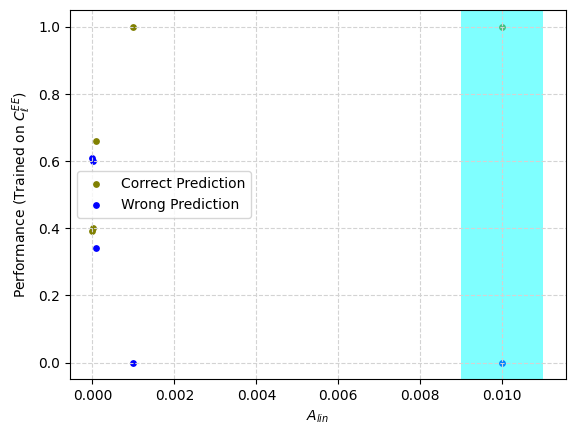

In [14]:
#Plot A_0 values vs NN performance (correct prediction & wrong prediction)
PS = 'EE'
Ax0_fid=1.e-2 #fiducial value
plt.scatter(Ax0, Corr_CEE, s=15, color='olive', label='Correct Prediction')
plt.scatter(Ax0, Wrong_CEE, s=15, color='blue', label='Wrong Prediction')
plt.axvspan(Ax0_fid-1.e-3, Ax0_fid+1.e-3, color='cyan', alpha=0.5, lw=0)
plt.grid(color='lightgray', linestyle='--')
plt.legend()
plt.xlabel('$A_{lin}$')
plt.ylabel('Performance (Trained on $C^{EE}_{\ell}$)')

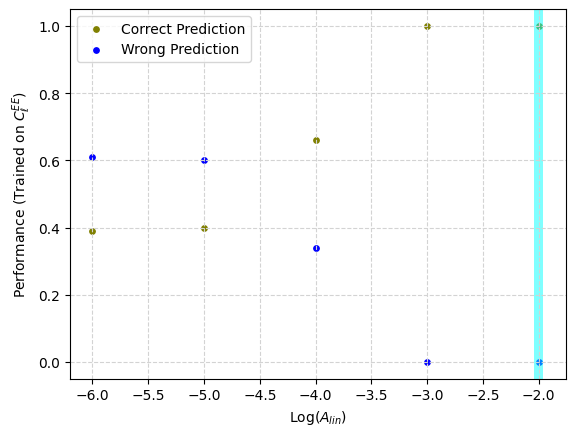

In [15]:
#Logarithmic plot for better visualization
plt.scatter(np.log10(Ax0), Corr_CEE, s=15, color='olive', label='Correct Prediction')
plt.scatter(np.log10(Ax0), Wrong_CEE, s=15, color='blue', label='Wrong Prediction')
plt.legend()
plt.grid(color='lightgray', linestyle='--')
plt.axvspan(np.log10(Ax0_fid-1.e-3), np.log10(Ax0_fid+1.e-3), color='cyan', alpha=0.5, lw=0)
plt.xlabel('Log($A_{lin}$)')
plt.ylabel('Performance (Trained on $C^{EE}_{\ell}$)')
plt.savefig('./figures/AX0_values%s.pdf' %PS)

## $A_{lin}$ size effect on the NN, trained with $C^{TE}_{\ell}$ data

Text(0, 0.5, 'Performance (Trained on $C^{TE}_{\\ell}$)')

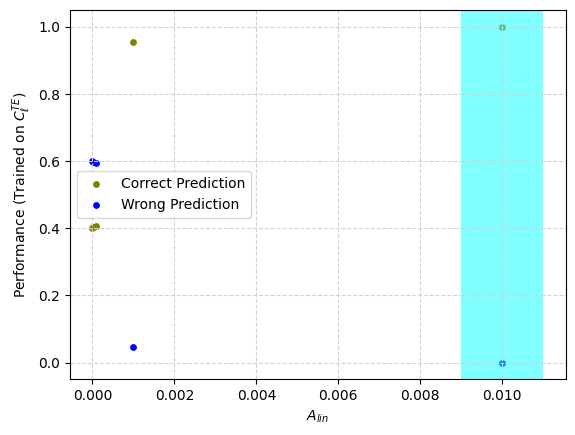

In [16]:
#Plot A_0 values vs NN performance (correct prediction & wrong prediction)
PS = 'TE'
plt.scatter(Ax0, Corr_CTE, s=15, color='olive', label='Correct Prediction')
plt.scatter(Ax0, Wrong_CTE, s=15, color='blue', label='Wrong Prediction')
plt.axvspan(Ax0_fid-1.e-3, Ax0_fid+1.e-3, color='cyan', alpha=0.5, lw=0)
plt.grid(color='lightgray', linestyle='--')
plt.legend()
plt.xlabel('$A_{lin}$')
plt.ylabel('Performance (Trained on $C^{TE}_{\ell}$)')

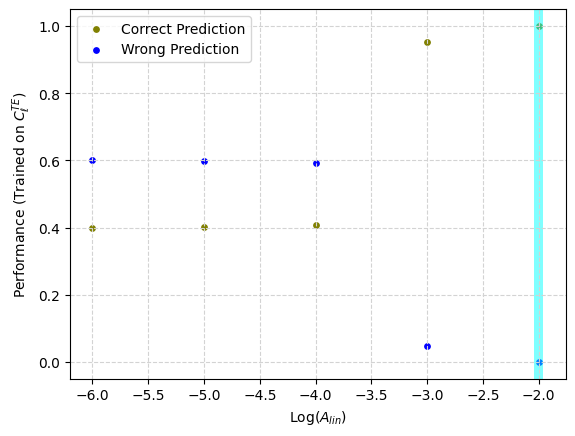

In [17]:
#Logarithmic plot for better visualization
plt.scatter(np.log10(Ax0), Corr_CTE, s=15, color='olive', label='Correct Prediction')
plt.scatter(np.log10(Ax0), Wrong_CTE, s=15, color='blue', label='Wrong Prediction')
plt.legend()
plt.grid(color='lightgray', linestyle='--')
plt.axvspan(np.log10(Ax0_fid-1.e-3), np.log10(Ax0_fid+1.e-3), color='cyan', alpha=0.5, lw=0)
plt.xlabel('Log($A_{lin}$)')
plt.ylabel('Performance (Trained on $C^{TE}_{\ell}$)')
plt.savefig('./figures/Ax0_values%s.pdf' %PS)

## $A_{lin}$ size effect on the NN, trained with $C^{TT}_{\ell}$ data

Text(0, 0.5, 'Performance (Trained on $C^{TT}_{\\ell}$)')

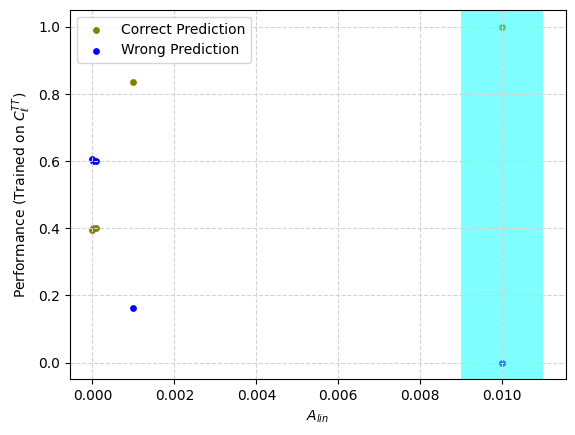

In [18]:
#Plot A_0 values vs NN performance (correct prediction & wrong prediction)
PS = 'TT'
plt.scatter(Ax0, Corr_CTT, s=15, color='olive', label='Correct Prediction')
plt.scatter(Ax0, Wrong_CTT, s=15, color='blue', label='Wrong Prediction')
plt.axvspan(Ax0_fid-1.e-3, Ax0_fid+1.e-3, color='cyan', alpha=0.5, lw=0)
plt.grid(color='lightgray', linestyle='--')
plt.legend()
plt.xlabel('$A_{lin}$')
plt.ylabel('Performance (Trained on $C^{TT}_{\ell}$)')

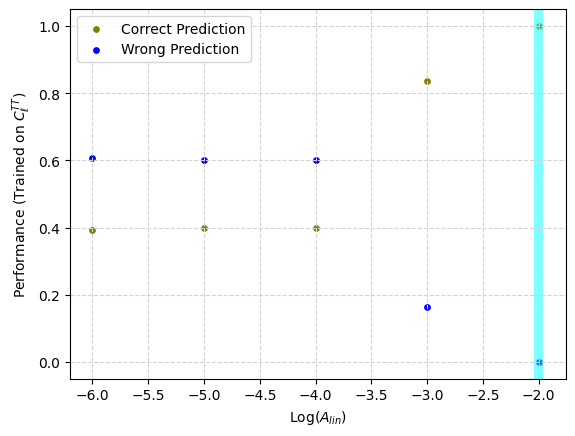

In [19]:
#Logarithmic plot for better visualization
plt.scatter(np.log10(Ax0), Corr_CTT, s=15, color='olive', label='Correct Prediction')
plt.scatter(np.log10(Ax0), Wrong_CTT, s=15, color='blue', label='Wrong Prediction')
plt.legend()
plt.grid(color='lightgray', linestyle='--')
plt.axvspan(np.log10(Ax0_fid-1.e-3), np.log10(Ax0_fid+1.e-3), color='cyan', alpha=0.5, lw=0)
plt.xlabel('Log($A_{lin}$)')
plt.ylabel('Performance (Trained on $C^{TT}_{\ell}$)')
plt.savefig('./figures/Ax0_values%s.pdf' %PS)

## $A_{lin}$ size effect on the NN, trained with $C^{TT}_{\ell}+C^{TE}_{\ell}+C^{EE}_{\ell}$ data

Text(0, 0.5, 'Performance (Trained on $C^{TT}_{\\ell}+C^{TE}_{\\ell}+C^{EE}_{\\ell}$)')

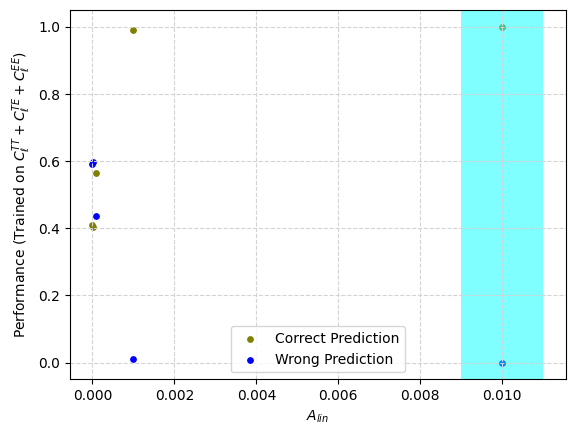

In [20]:
#Plot A_0 values vs NN performance (correct prediction & wrong prediction)
PS = 'Joint'
plt.scatter(Ax0, Corr_Joint, s=15, color='olive', label='Correct Prediction')
plt.scatter(Ax0, Wrong_Joint, s=15, color='blue', label='Wrong Prediction')
plt.axvspan(Ax0_fid-1.e-3, Ax0_fid+1.e-3, color='cyan', alpha=0.5, lw=0)
plt.grid(color='lightgray', linestyle='--')
plt.legend()
plt.xlabel('$A_{lin}$')
plt.ylabel('Performance (Trained on $C^{TT}_{\ell}+C^{TE}_{\ell}+C^{EE}_{\ell}$)')

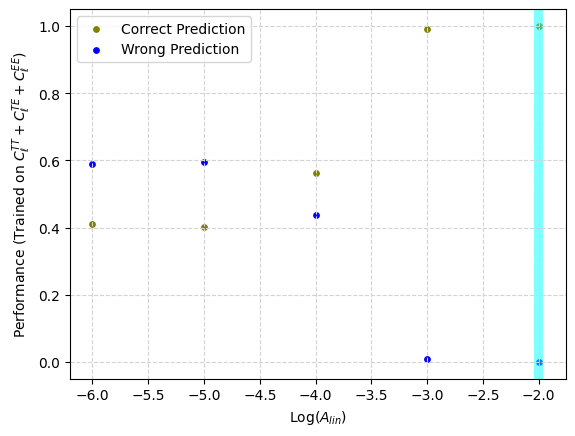

In [21]:
#Logarithmic plot for better visualization
plt.scatter(np.log10(Ax0), Corr_Joint, s=15, color='olive', label='Correct Prediction')
plt.scatter(np.log10(Ax0), Wrong_Joint, s=15, color='blue', label='Wrong Prediction')
plt.legend()
plt.grid(color='lightgray', linestyle='--')
plt.axvspan(np.log10(Ax0_fid-1.e-3), np.log10(Ax0_fid+1.e-3), color='cyan', alpha=0.5, lw=0)
plt.xlabel('Log($A_{lin}$)')
plt.ylabel('Performance (Trained on $C^{TT}_{\ell}+C^{TE}_{\ell}+C^{EE}_{\ell}$)')
plt.savefig('./figures/Ax0_values%s.pdf' %PS)